# Problem Statement 

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

## Data Dictionary 

* **id:** Unique ID for the customer
* **Gender:** Gender of the customer
* **Age:** Age of the customer
* **Driving_License:** Customer does not have DL, 1 : Customer already has DL
* **Region_Code:** Unique code for the region of the customer
* **Previously_Insured:** 1: Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
* **Vehicle_Age:** Age of the Vehicle 
* **Vehicle_Damage:**  1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
* **Annual_Premium:** The amount customer needs to pay as premium in the year
* **Policy_Sales_Channel:** Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* **Vintage:** Number of Days, Customer has been associated with the company
* **Response:** 1 : Customer is interested, 0 : Customer is not interested

### Importing Libraries

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Importing Train and Test Data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Train data 

In [5]:
#Head of the train data 
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
#Shape of the train data
train.shape

(381109, 12)

Number of rows: 3,81,109
<br>Number of columns: 12

In [7]:
#data type of train data variables
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

* **Driving_Licence** should be object/binary type.
* **Region_Code** should be object type.
* **Response** should be object type. 

In [8]:
#Duplicates in train data
train.drop('Response', axis=1).duplicated().sum()

0

* **No duplicates** in the train data.

In [9]:
#Null values in the train data
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* **No null** values present in the train data.

#### Test data

In [10]:
#head of test data
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [11]:
#Rows and columns in test data
test.shape

(127037, 11)

Number of rows: 1,27037
<br>Number of columns: 11

In [12]:
#data types of test data
test.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

In [13]:
#Duplicates in test data
test.duplicated().sum()

0

* **No duplicate** values in the test data.

In [14]:
#Null values is test data.
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

* **No null values** in the test data.

**Changing data types of required variables** 

In [15]:
#Function to change datatypes
def Change_Datatype(data, col):
    """
    Function takes in the dataset and list of columns and coverts the columns to object data type. 
    """
    for i in col:
        data[i] = data[i].astype('object')
    
    return data                  
                                 
#Changing data types of train variables 
train = Change_Datatype(train, ['Driving_License', 'Region_Code', 'Response', 'Vehicle_Age', 'Previously_Insured'])
test = Change_Datatype(test, ['Driving_License', 'Region_Code', 'Vehicle_Age', 'Previously_Insured'])

## Univariate Analysis (Continious Variables)

In [16]:
def UVA_Cont(data, var, include_outlier=True):
    
    """
    Function for univariate analysis of continiuous variables.
    Plots Kdeplot and Boxplot for given continiuous variable. 
    It also takes in argument of wheater to include the outliers while ploting the graphs or not.
    By default it plots graphs with outliers.
    """
    
    if include_outlier == False:
        
        #Calculating quantiles 
        quant25 = data[var].quantile(0.25)
        quant75 = data[var].quantile(0.75)
        IQR     = quant75 - quant25
        
        # Fitlering data(removing outliers)
        data[var] = data[var][(data[var] < (quant75+ 1.5*IQR)) & (data[var] > (quant25- 1.5*IQR))].copy()
    
    
    #Calculating descriptive statistics 
    mini    = data[var].min()
    maxi    = data[var].max()
    rang    = mini - maxi
    mean    = data[var].mean()
    med     = data[var].median()
    std_    = data[var].std()
    skew    = data[var].skew()
    kurt    = data[var].kurtosis()
    quant25 = data[var].quantile(0.25)
    quant75 = data[var].quantile(0.75)
    IQR     = quant75 - quant25
    whis_low = quant25 - (1.5*IQR)
    whis_high = quant75 + (1.5*IQR)
    
    #Calculating the points of standerd daviation 
    points = mean-std_, mean+std_
    
    # Calculating Number of Outliers
    outlier_high = len(data[var][data[var]>whis_high])
    outlier_low = len(data[var][data[var]<whis_low])
    

    #Ploting kdeplot for continious variable 
    plt.figure(figsize=(18,8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax0 = plt.subplot(gs[0])
    
    sns.kdeplot(data[var],shade=True)
    sns.lineplot(points,[0,0],color='black',label='std_dev')
    sns.scatterplot([mini,maxi],[0,0],color='red',label='min\max')
    sns.scatterplot(mean,[0],color='blue',label='mean')
    sns.scatterplot(med,[0],color='green',label='median')
    plt.xlabel("{}".format(var),fontsize=(14))
    plt.ylabel('density',fontsize=(14))
    plt.tight_layout()
    plt.title('\tstd_dev= {}; \tkurtosis= {}; \tskew= {};\n\tmean= {}; \tmedian= {}; \trange = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                               round(kurt,2),
                                                                                                 round(skew,2),
                                                                                                 round(mean,2),
                                                                                                 round(med,2),
                                                                                                 (round(mini,2),round(maxi,2),round(rang,2))),fontsize=14)
    plt.tight_layout()
        
    #Ploting boxplot for continious variable
    ax1 = plt.subplot(gs[1])
    sns.boxplot(data[var], orient="v")
    plt.title('\tIQR = {};\tOutlier (low/high) = {};\n\t2nd,3rd  quartile = {};'.format(round(IQR,2),
                                                                                            (outlier_low,outlier_high),
                                                                                            (round(quant25,2),round(quant75,2))), fontsize=14)
    plt.ylabel("{}".format(var),fontsize=(14))
    plt.tight_layout()
        

### 1. id

In [17]:
print('Number of unique values in ID:', train['id'].nunique())
print('Number of rows in the data:', train.shape[0])

Number of unique values in ID: 381109
Number of rows in the data: 381109


* **Observation:**
* Number of unique ids is exactly equal to the number of rows we have in the train data.
* id is just a unique number given to each user.
* id will not be useful for our analysis and later for modeling. 

### 2. Annual_Premium 

**Ploting the variable:**

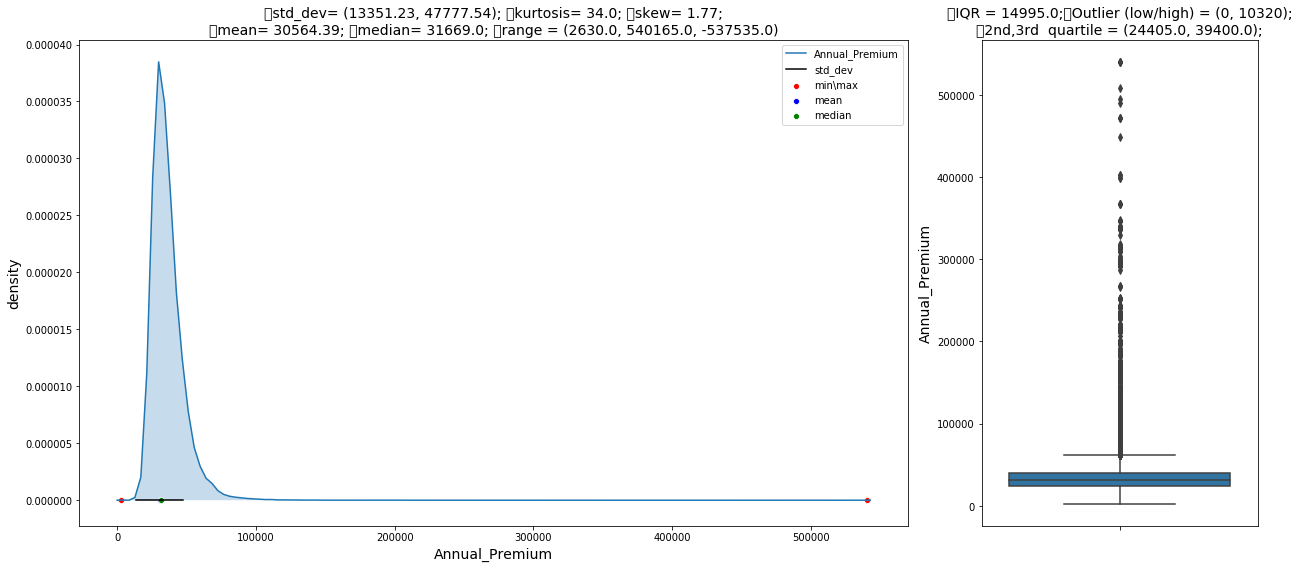

In [18]:
UVA_Cont(train, 'Annual_Premium', include_outlier=True)

#### Observations:
* **From Kdeplot:**
    * The variable is highly right skeewed, Some customers have to pay very high annual premium.
    * Majority of the customers have annual premium between 1,3000 to 48,000.
    * Lowest annual premium is 2,630 while highest annual premium is 5,40165(huge difference).
* **From Boxplot:**
    * There are alot of outliers present outside the higher wiskers of the boxplot.
    * No outliers present outside the lower wiskers of the boxplot.
   
   
**To investigate:**
* Does high annual premium signifies that the customer owns expensive vehicles?
* Demographics of customer might give show some trends related to annual premium.
* Does higher annual premium signifies that customer won't buy the insaurance? 
    


#### Ploting Annual_Premium without outliers

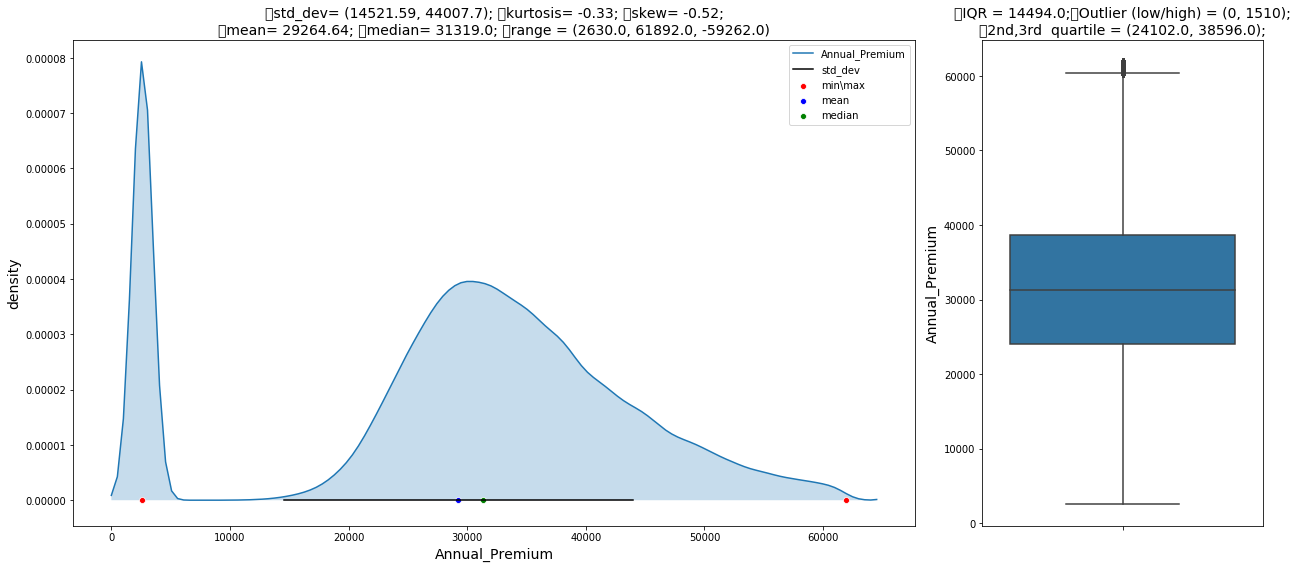

In [19]:
UVA_Cont(train, 'Annual_Premium', include_outlier=False)

#### Observations:
* **From Kdeplot:**
     * After removing the outliers we can see the column is following a bimodel distribution.
     * There is a high peak towards 3,000 and again we see a hike towards 25,000 to 35,000.
* **From Boxplot:**
    * After removing the outliers we can see there is a even distribution in boxplot.

**Note:** The reason for two peaks could be that the first peak shows the Annual_Premium for the 2 wheelers and the second peak is for the four wheeler vehicles.

**To Investigate:**
* Do the custemers having lower annual premium amount(2 wheeler owners) have higher probability of buying insaurance?

### 3. Age

**Ploting the variable**

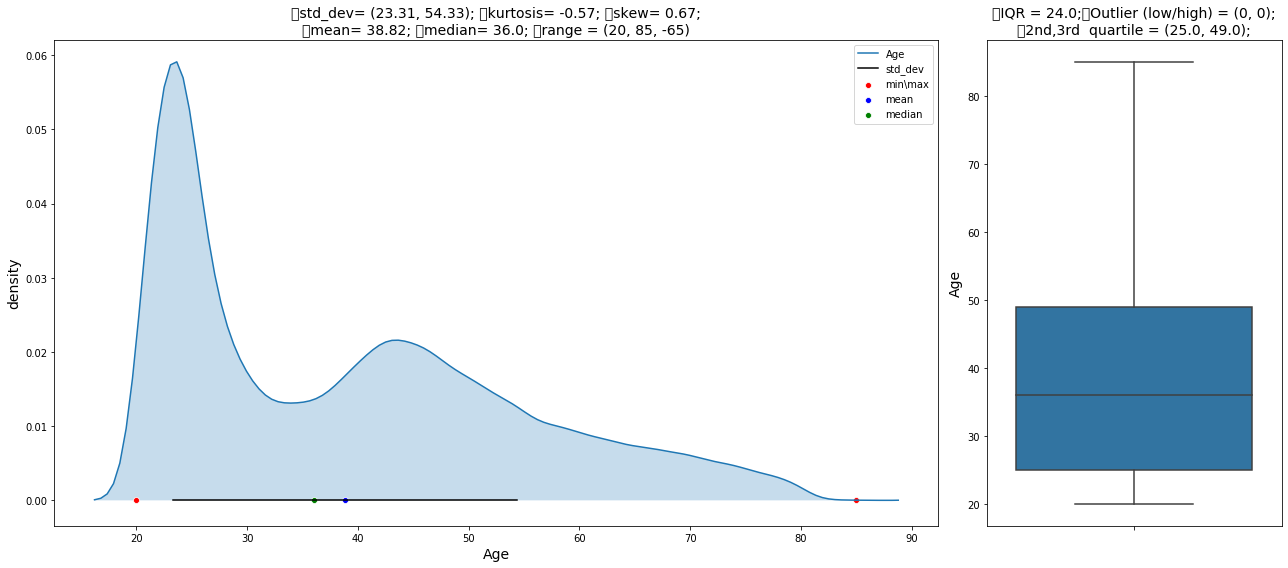

In [20]:
UVA_Cont(train, 'Age')

**Observations:**
* **From Kdeplot:**
    * The age variable is right skeewed which can be seen through the kdeplot and the skeewness value.
    * The minimum and maximum age of the customers are 20 and 85 repectively which makes sense. 
    * Most of the customers are middle aged starting from 23 years.
    * There is a slight peak of frequency for the ages between 42 to 48.
* **From Boxplot:**
    * There is no ouliter present on the either side of the wiskers.
    * The variable is evenly distibuted with a longer upper wiskers which can also be validated by kdeplot.
    * 75% of customers are under 50 years of age. 
    
**To Investigate:**
* Do the retired customers have more probability of buying insurance?
* Do the young adults have lower probability of buying insurance?

### 4. Policy_Sales_Channel

**Ploting the variable**

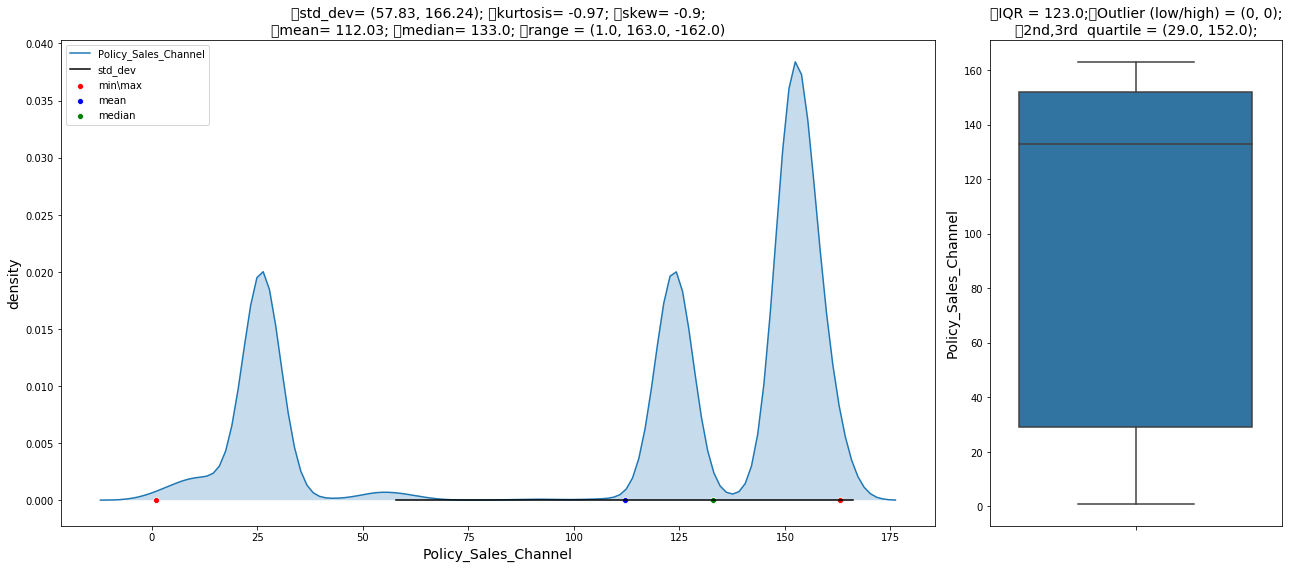

In [21]:
UVA_Cont(train, 'Policy_Sales_Channel')

In [22]:
train['Policy_Sales_Channel'].nunique()

155

In [23]:
test['Policy_Sales_Channel'].nunique()

145

### 5. Vintage

**Ploting the variable**

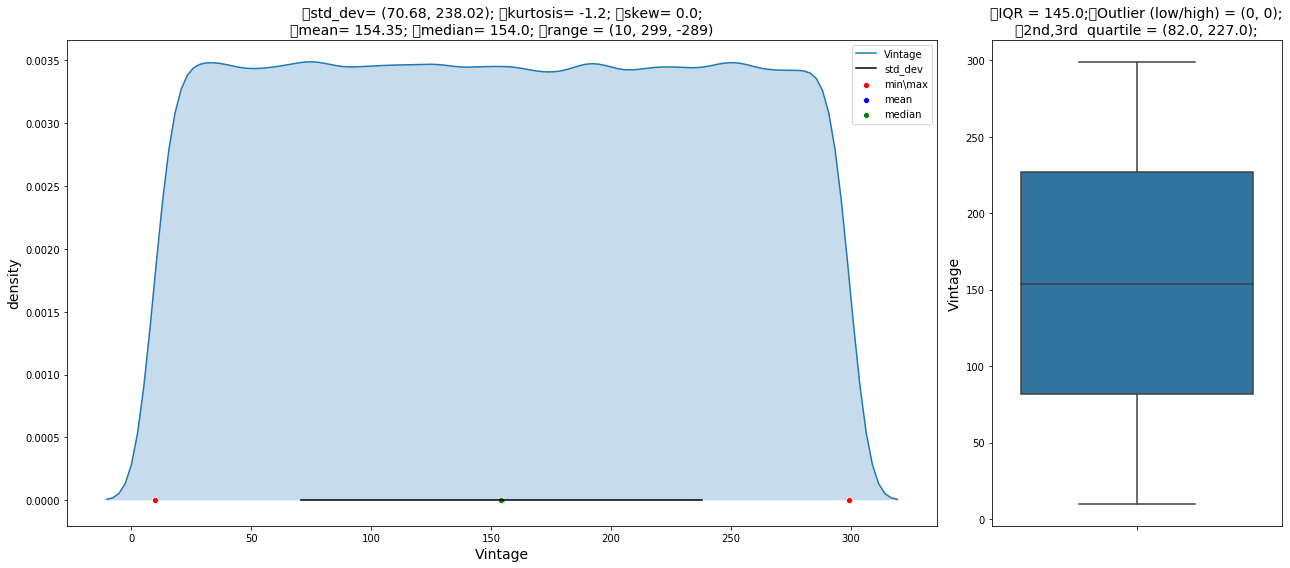

In [24]:
UVA_Cont(train, 'Vintage')

**Observations:**
* **From Kdeplot:**
    * The variable is showing a uniform distribution throughout different number of days.
    * The customer atleast for 10 days and at most for 299 days assosiated with the bank.
    * The kdeplots suggests that number of customers assosiated with the company is similar from different number of days.
    * This is strange that there is no difference in the number of customers for different days od assosiation.
    
* **From Boxplot:**
    * There are no outliers present in the vintage variable.
    * The boxplot shows the similar results, that is the customers are evenly distributed for different days.
    

## Univariate Analysis(Categorical Variables)

In [25]:
def UVA_Cat(data, column, rot=0):
    """
    Function to plot countplot and pie chart for categorical variables.
    
    """
    for j, i in enumerate(column):
        
        #plt.subplot(2,1, j+1)
        
        # Setting the figure size
        plt.figure(figsize=(10,3), dpi=100)
    
    
        # ploting the barplot
        plt.subplot(1,2,1)
        g=sns.countplot(x=i, data= data)
        plt.title('Barplot for {}'.format(i), fontsize=14)
        plt.xticks(rotation=rot)
        plt.tight_layout()
        
        #ploting the pie chart 
        plt.subplot(1,2,2)
        plt.axis('equal')
        plt.pie(x= data[i].value_counts(), labels= data[i].value_counts().index, autopct='%0.1f%%', shadow=True)
        plt.title('Pie chart for {}'.format(i), fontsize=14)
        plt.tight_layout()
        plt.show()

### 6. Gender and 7. Driving_License

**Ploting the bar and pie chart**

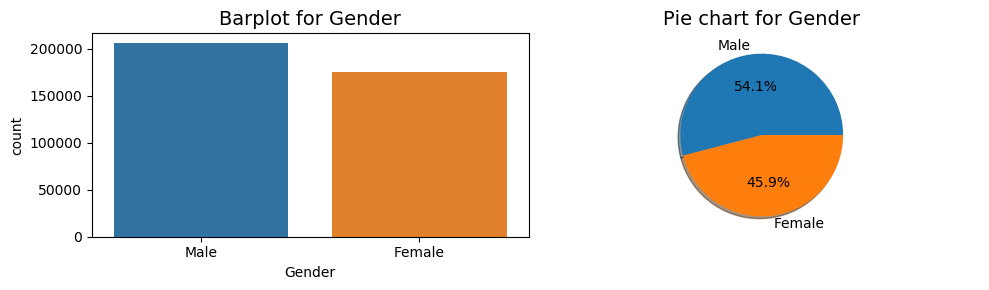

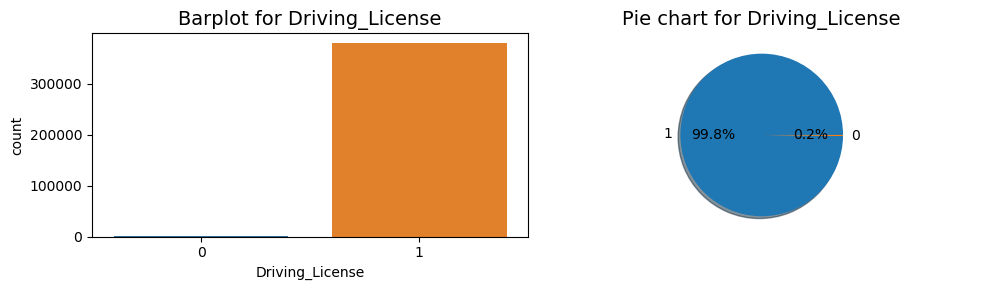

In [26]:
UVA_Cat(train,['Gender', 'Driving_License'] )

**Observation:**
* **For Gender:**
    * 54% of the customers are male who owns the vehicle. 
    * 45% of the customers are female who owns the vehicle.
* **For Driving_License:**
    * 99.8% of the customers have driving license.
    * Only 0.2% of the customers doesn't have driving license.
    * Potential reasons for not having a licence:
        * Customer have recently bought the vehicle and is learning or had applied for driving license.
        * Customer's driving license got expired and it needs to be renewed.
        * Customer has lost its driving license.
        * Customer's driving license got suspended due to not following the traffic rules.
        
**To Invetigate:**
* The percentage of male and female customers is some what similar but do they have the similar percentage in buying the insurance?
* Do the customer that doesn't own the license tends to not buy the insurance?

### 8. Vehicle_Age and 9. Vehicle_Damage

**Ploting bar and pie chart**

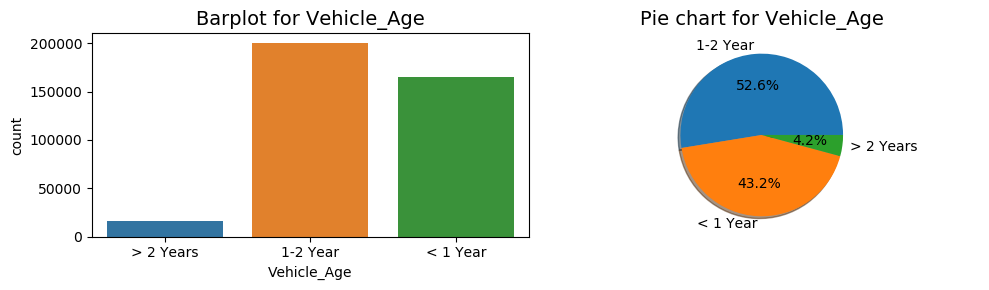

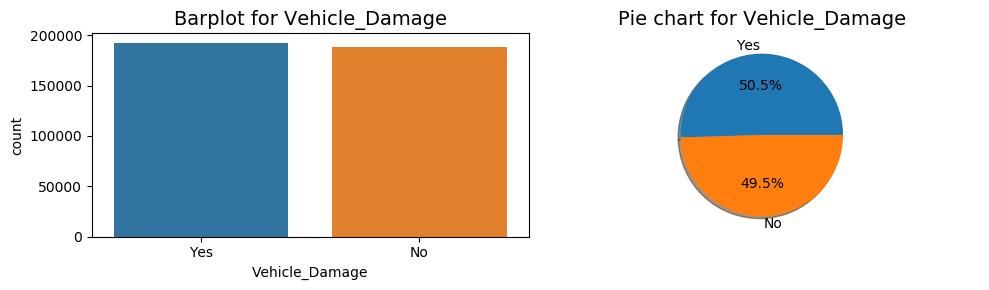

In [29]:
UVA_Cat(train, ['Vehicle_Age', 'Vehicle_Damage'])

**Observations:**
* **For Vehicles_Age:**
    * 95% of the customer's vehicle is relativly new(less than 2 years old).
    * Only 4.2% of vehicles are greater than 2 years of age.
    * Note, It is compulsory to buy insurance while buying a new car.
    * So there is a high probability that the car less than a year old will already be insured.
* **For Vehicles_Damage:**
    * The percent of vehicles damaged and not damaged are approximatly equal. 
    * Although majority of the cars are farly new but still half of then got damaged at least once.
    * There is a high probability that the customer who had there car damaged once will buy the insarance.
    
**To Investigate:**
* Do customers with new cars have very low chance of buying the insurance?
* Do customers that had damaged there cars once have higher chances of buying the insurance?
* Do newer cars(less than year old) have lower probability of getting damaged and therefore lower chances of getting a insurance?

### 10. Previously_Insured

**Ploting bar and pie chart**

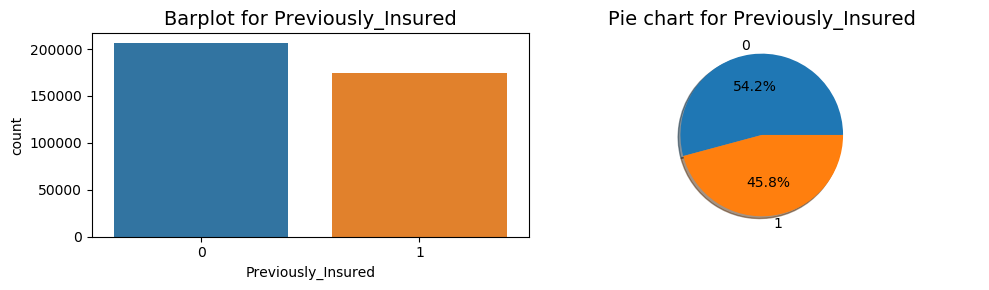

In [52]:
UVA_Cat(train, ['Previously_Insured'])

**Observations:**
* 54% of the customers doesn't have an insurance.
* 46% of the customers already have an insurance.

**Note:**
* There is a high probability that the customer who have a new car(less than year old) will already have an insurance.
* Customers who already have an insurance will be very less likely to be interested in buying an insurance.
* But if the customers previous insurance is about to expire there is a high chance they could buy an insurance.


### 11. Region_Code

**Checking number of unique regions the company is selling insurance in**

In [89]:
print("The number of unique regions are:",train['Region_Code'].nunique())

The number of unique regions are: 53


**Lineplot for the percentage of customers present in different regions**

Text(0, 0.5, 'Percentage')

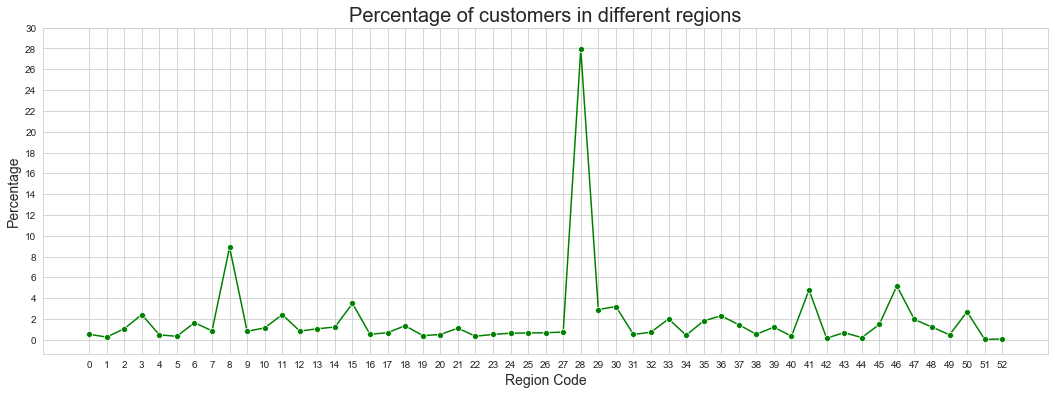

In [90]:
plt.figure(figsize=(18,6))
sns.set_style('whitegrid')
sns.lineplot(x=train['Region_Code'].value_counts().index, y=train['Region_Code'].value_counts(normalize=True)*100, marker='o', color='green', palette='Set1')
plt.xticks(range(0,53))
plt.yticks(range(0,31,2))
plt.title('Percentage of customers in different regions', fontsize=20)
plt.xlabel('Region Code', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

**Observations:**
* Out of all the 53 regions, 28% of the customers that are assosiated with the insurance company are from region 28.
* Most of the region have customer precentages from 0.5% to 3%. 

**To investigate:**
* Do region 28 have higher percent of customers that will opt for an insurance?

### Response(Target)

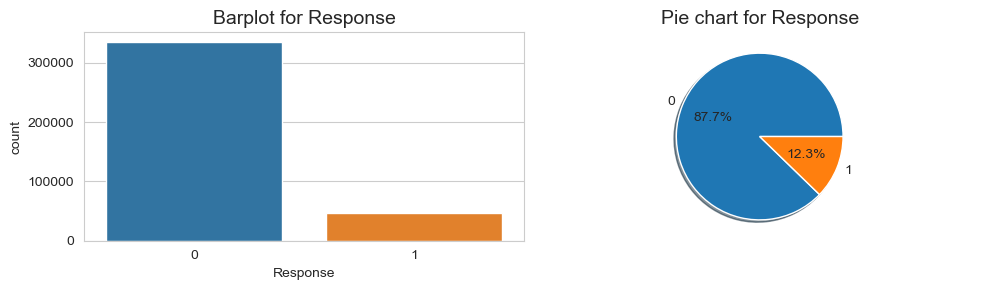

In [92]:
UVA_Cat(train, ['Response'])

**Observations:**
* 88% of customers are not opting for insurance and only 12.3% of customers are buying car insurance.
* We have a class imbalance problem for out target Response.

## Bivariate Analysis(Cont-Cat)

In [122]:
# function to operate 2-sample z test
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    ovr_sigma = sqrt((sigma1**2/N1)+(sigma2**2/N2))
    z = (X1-X2)/ovr_sigma
    pval = 2*(1- norm.cdf(abs(z)))
    return pval

In [123]:
# function to preform 2-sample t-test
def TwoSampT(x1, x2, sd1, sd2, n1, n2):
    
    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dst
    over_sd = sqrt(((sd1**2/n1) + (sd2**2/n2)))
    t = (x1-x2)/over_sd
    df = n1+n2-2
    pval = 2*(1-t_dst.cdf(abs(t),df))
    return pval

In [132]:
def BVA_Cont_Cat(data, cont, cat, stat_test=False):
    
    """
    """
    
    # Perform a t-test z-test if condition is true
    if stat_test == True:
        
        # giving category as 1
        category = 1
        
        # creating 2 samples
        x1 = data[cont][data[cat]==category][:]
        x2 = data[cont][~(data[cat]==category)][:]
        
        # calculating descriptive statistics 
        n1, n2 = x1.shape[0], x2.shape[0]
        m1, m2 = x1.mean(), x2.mean()
        std1, std2 = x1.std(), x2.std()
        
        # calculating p-values
        t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
        z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)
    
    #Setting the figure size
    plt.figure(figsize=(18,7))
    
    #Ploting barplot between cont. var and target
    plt.subplot(1,2,1)
    g = sns.barplot(x=cat, y=cont, data=data, ci=False, palette='Set2')
    
    if stat_test == True:
        plt.title('Barplot for {} and Response\n\tt-test p-value = {} \tz-test p-value = {}'.format(cont,t_p_val, z_p_val), fontsize=16)
    
    else:
        plt.title('Barplot for {} and Response'.format(cont), fontsize=16)
    
    plt.xlabel('{}'.format(cat),fontsize=12)
    plt.ylabel('{}'.format(cont),fontsize=12)
    for i in g.patches:
            g.annotate(s='{:.0f}'.format(i.get_height()), xy=(i.get_x()+0.3, i.get_height()+1))
    
    #Ploting stripplot between cont var and target 
    plt.subplot(1,2,2)
    sns.stripplot(x=cat, y=cont, data=data, palette='Set2')
    plt.title('Stripplot for {} and Response'.format(cont), fontsize=16)
    plt.xlabel('{}'.format(cat),fontsize=12)
    plt.ylabel('{}'.format(cont),fontsize=12)
    plt.tight_layout()

### Annual_Premium 

**Ploting barplot and stripplot** 

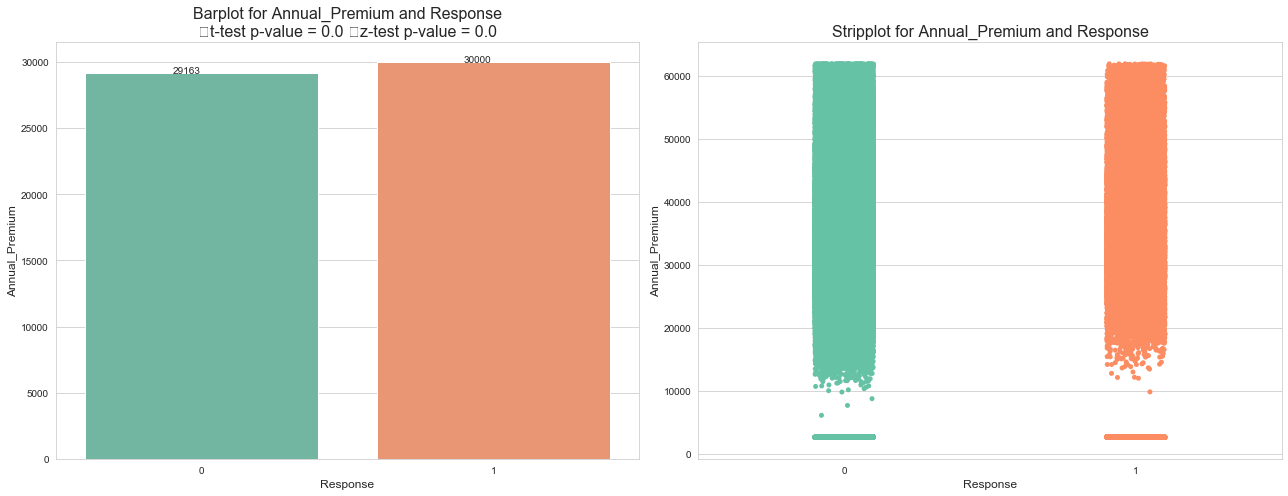

In [133]:
BVA_Cont_Cat(train, 'Annual_Premium', 'Response', stat_test=True)

**Observations:**
* **From Barplot:**
    * Barplots shows that average annual premium for both class is very small.
    * The average annual premium for class 0 and 1 is 29,163 and 30,000 respectivly.
    * t-test and z-test values is smaller than alpha(0.05), we can conclude the mean are significantly different.
* **From Stripplot:**
    * There a huge gap from 4,000 to 10,000 range of annual premium amounts.
    * Can we confirm that the lower amount signifies the annual premium for two wheelers?
    * Also, There are lower number of customers that are interested for the loans but have moderate annual premium amount.
    * Can we conclude that the customer having cheaper cars avoid taking insurance?
    

### Age

**Ploting barplot and stripplot**

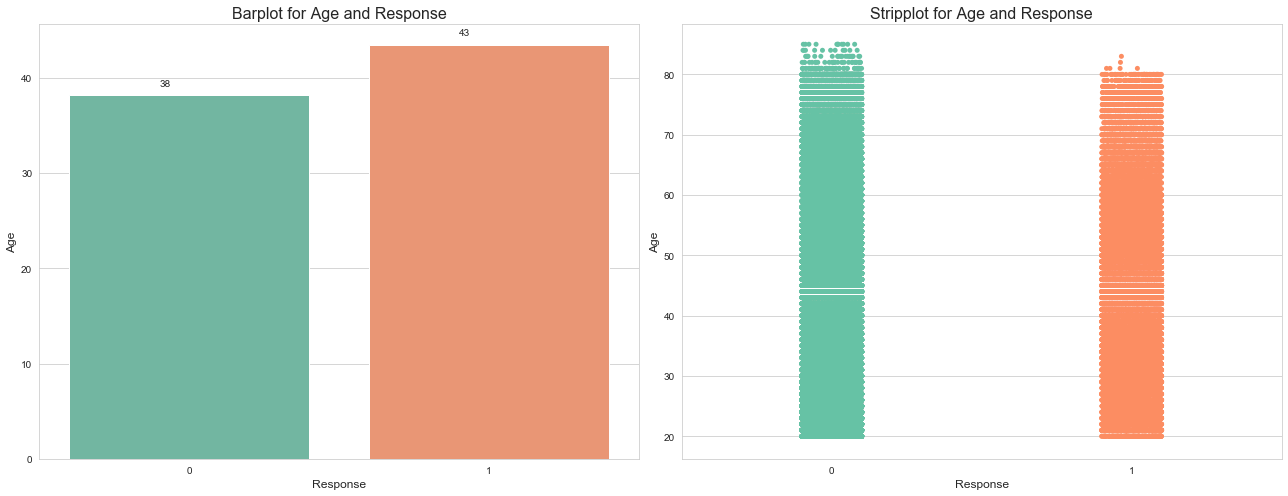

In [136]:
BVA_Cont_Cat(train, 'Age', 'Response')

#### Observations:
* **From Barplot:**
    * The average age for customers opting for insurance is 43.
    * The average age for customers not opting for insurance is 38.
* **From Striplot:**
    * Most of the customer ages greater than 80 is not otping for the companies insurance.
    * There are not many trends that we could see in the stripplot.

In [146]:
print('\033[1mPercentage of customers greater than 80 wrt response:\033[0m')
print(train[train['Age']>=80]['Response'].value_counts(normalize=True)*100)

Percentage of customers greater than 80 wrt response:
0    93.737958
1     6.262042
Name: Response, dtype: float64


**Note:** Approximatly, 94% of the customers ages greater than 80 is not buying insurance.

**Conclusion:** Very old people tends not to buy the car insurance.

### Vintage

**Ploting the barplot and the stripplot**

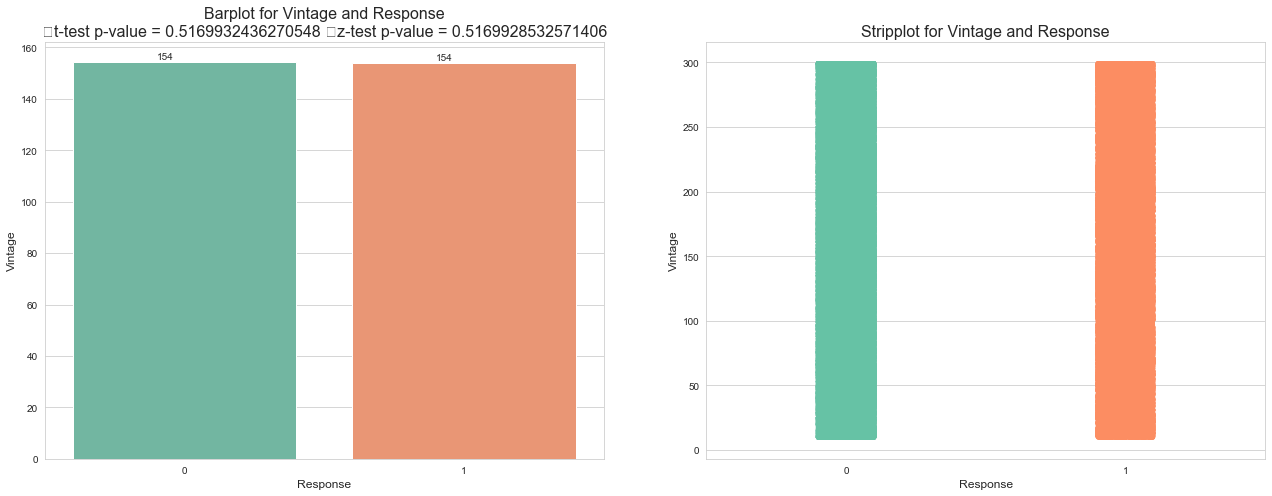

In [148]:
BVA_Cont_Cat(train, 'Vintage', 'Response', stat_test=True)

#### Observation:
* **From Barplot:**
    * The mean vintage days is exactly equal for both 0 and 1 response i.e. 154.
    * We can validate it by the t ad z test p-value that the means are not statistically different.
* **From Stripplot:**
    * The stripplot also shows the similar distribution for both classes of response.

**Conclusion:** Vintage variable will not be very useful for our modeling. 

## Bivariate Analysis(Cat-Cat)

In [217]:
def BVA_cat_cat(data, tar, cat):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat],)
    f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(f_obs)
  
    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False
    
    #plotting grouped plot
    g = sns.countplot(x=cat, hue=tar, data=data)
    plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))
    for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
            y+height, 
            '{:.0f}'.format(height), 
            horizontalalignment='center')

    
    
    #plotting percent stacked bar plot
    g = (data.groupby(cat)[tar].value_counts(normalize=True)*100).unstack().plot(kind='bar', stacked='True')
    plt.ylabel('Percentage')
    for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')


### Diriving License

**Barplots for the variables**

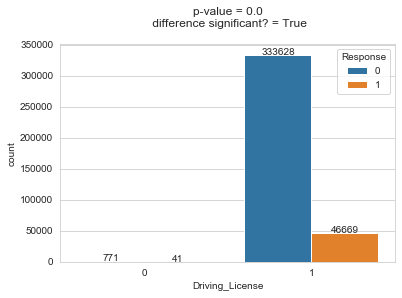

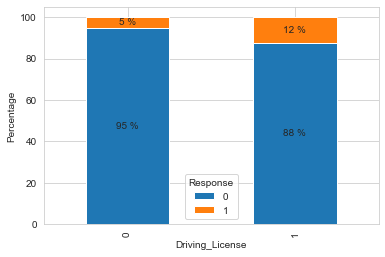

In [219]:
BVA_cat_cat(train, 'Response', 'Driving_License')

#### Observations:
* From the barplot, we can clearly see the ratio of not having driving lincense to having is negligible.
* Also, people who doesn't have lincense have a hogher percent chances of not buying an insurance.
* There is a 12% chance that the customer will buy insurance if they have a driving lincense.

In [228]:
train[train['Driving_License'] == 0].groupby('Vehicle_Age')['Age'].mean()

Vehicle_Age
1-2 Year     65.572185
< 1 Year     21.000000
> 2 Years    66.839286
Name: Age, dtype: float64

### Gender

**Ploting barplots for the variable**

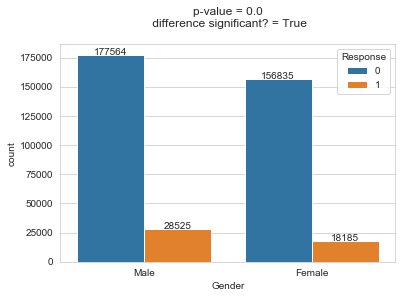

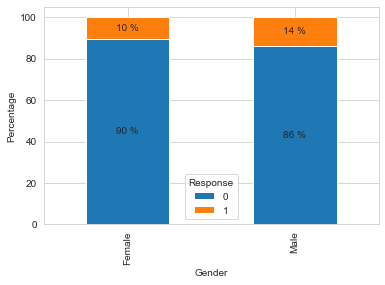

In [222]:
BVA_cat_cat(train, 'Response', 'Gender')

#### Observations:
* There are 10,000 more male customers than female who are buying insurance.
* This can be validated it stacked barplot that tells, percent of male customers is 4% more than female that are buying the insurance.


### Previously_Insured

**Ploting barplots for the variable**

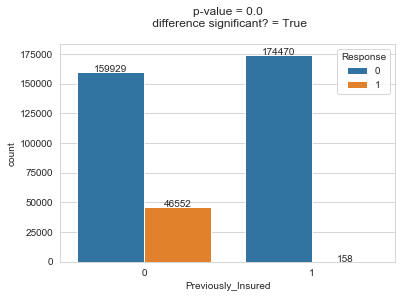

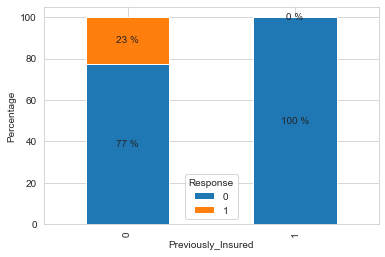

In [224]:
BVA_cat_cat(train, 'Response', 'Previously_Insured')

**Observation:**
* There is 23% chance that customer would buy insurance from our company if the vehicle is not insured.
* There less than 0.5% chances that the person will buy insurance if it's vehicle is already insured.
* Could these people are those whose insurance is about to expire?

In [226]:
train[(train['Previously_Insured'] == 1) & train['Response'] == 1]['Vehicle_Age'].value_counts()

1-2 Year     95
< 1 Year     62
> 2 Years     1
Name: Vehicle_Age, dtype: int64

### Vehicle_Age

**Ploting barplots for the variable**

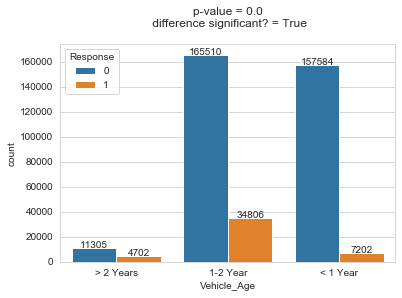

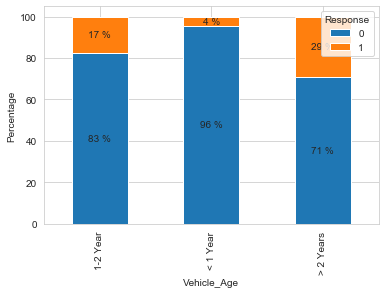

In [230]:
BVA_cat_cat(train, 'Response', 'Vehicle_Age')

### Observations:
* Most number of cutomers that have opted for insurace have vehicle age between 1-2 years.
* Although, the number of customers with vehicle age greater than 2 yeas is very low but 29% of those customers are opting for insurance.
* Only 4% of customers are opting for insurance that have new cars(less than a year old) and that makes sense.

In [239]:
train[(train['Vehicle_Age'] == '< 1 Year') & (train['Response'] == 1)]['Vehicle_Damage'].value_counts(normalize=True)

Yes    0.946404
No     0.053596
Name: Vehicle_Damage, dtype: float64

In [240]:
train[(train['Vehicle_Age'] == '< 1 Year') & (train['Response'] == 0)]['Vehicle_Damage'].value_counts(normalize=True)

No     0.73741
Yes    0.26259
Name: Vehicle_Damage, dtype: float64

### Vehicle_Damage

**Ploting barplots for the variable**

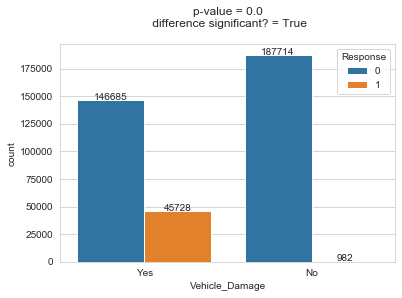

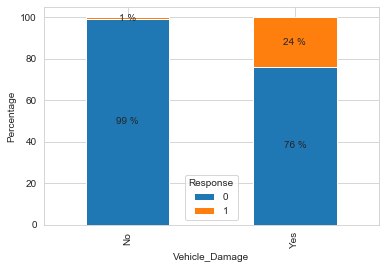

In [243]:
BVA_cat_cat(train, 'Response', 'Vehicle_Damage')

#### Observations:
* If the vehicle is not damaged only 1% of the customers had opted for the insurance.
* If the vehicle is damaged 24% of the customers are opting for the insurance.

In [245]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

### Region_Code

Text(0.5, 0, 'Region Code')

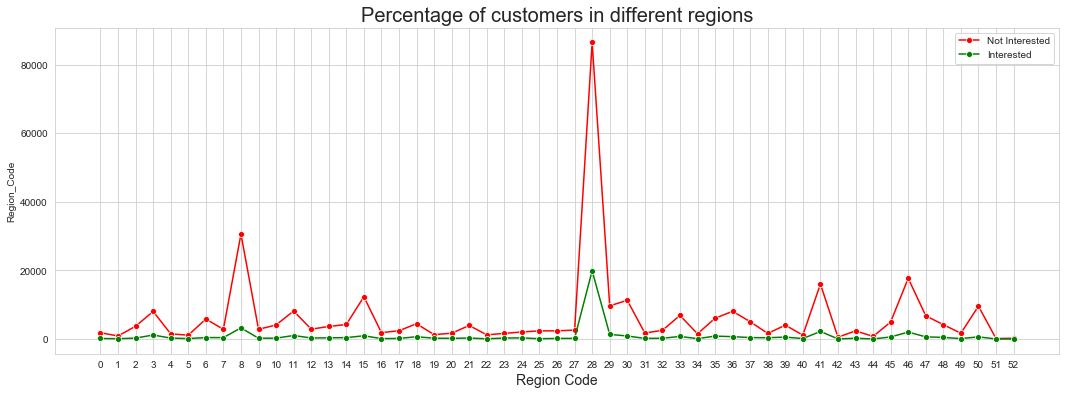

In [260]:
plt.figure(figsize=(18,6))
sns.set_style('whitegrid')
sns.lineplot(x=train['Region_Code'][train['Response'] == 0].value_counts().index, y=train['Region_Code'][train['Response'] == 0].value_counts(), marker='o', color='red', palette='Set1', label='Not Interested')
sns.lineplot(x=train['Region_Code'][train['Response'] == 1].value_counts().index, y=train['Region_Code'][train['Response'] == 1].value_counts(), marker='o', color='green', palette='Set1', label='Interested')
plt.xticks(range(0,53))
#plt.yticks(range(0,31,2))
plt.title('Percentage of customers in different regions', fontsize=20)
plt.xlabel('Region Code', fontsize=14)
#plt.ylabel('Percentage', fontsize=14)

Text(0.5, 0, 'Region Code')

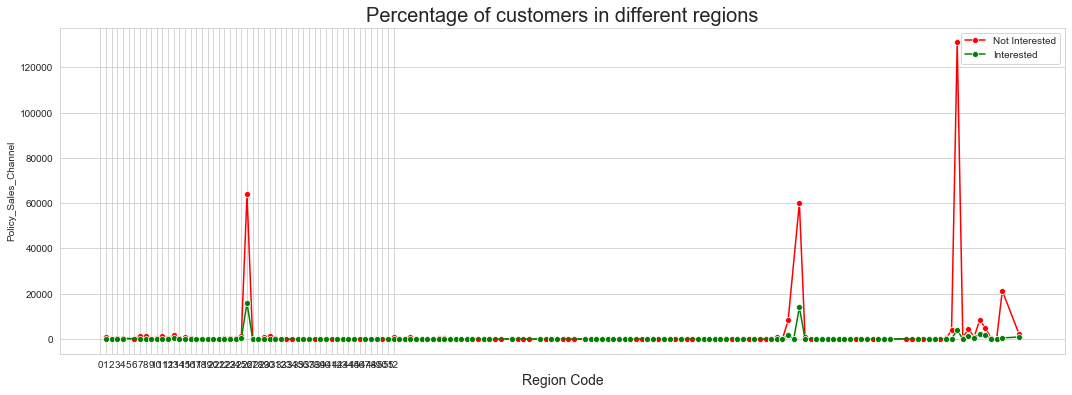

In [261]:
plt.figure(figsize=(18,6))
sns.set_style('whitegrid')
sns.lineplot(x=train['Policy_Sales_Channel'][train['Response'] == 0].value_counts().index, y=train['Policy_Sales_Channel'][train['Response'] == 0].value_counts(), marker='o', color='red', palette='Set1', label='Not Interested')
sns.lineplot(x=train['Policy_Sales_Channel'][train['Response'] == 1].value_counts().index, y=train['Policy_Sales_Channel'][train['Response'] == 1].value_counts(), marker='o', color='green', palette='Set1', label='Interested')
plt.xticks(range(0,53))
#plt.yticks(range(0,31,2))
plt.title('Percentage of customers in different regions', fontsize=20)
plt.xlabel('Region Code', fontsize=14)
#plt.ylabel('Percentage', fontsize=14)